# **Aprendizaje de maquina supervisado**
## Support Vectors Machine


**Docente:** PhD Jorge Rudas

**Aprendizaje de Máquina - 2025 I**

**INFOTEP**

In [41]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from IPython.display import Image
from sklearn import metrics

## **Cancer de mama - Dataset**

In [42]:
Image(url= 'https://cimcegi.com/wp-content/uploads/2017/09/d5-caso-3-1.jpg')

In [43]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

print("Caracteristicas: ", cancer.feature_names)
print("Etiqueta: ", cancer.target_names)
print(X.shape)
print(y.shape)

Caracteristicas:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Etiqueta:  ['malignant' 'benign']
(569, 2)
(569,)


In [44]:
print(cancer.data[0:5])
print(cancer.target)



[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

# **Split de los datos para ser usados en un modelo de aprendizaje de maquina**

In [45]:
def dibujar_svm(model):

  # Se dibujan los datos y el plano de decisión

  DecisionBoundaryDisplay.from_estimator(
          model,
          X,
          response_method="predict",
          cmap=plt.cm.Spectral,
          alpha=0.8,
          xlabel=cancer.feature_names[0],
          ylabel=cancer.feature_names[1],
      )

  plt.scatter(X[:, 0], X[:, 1],
              c=y,
              s=20, edgecolors="k")
  plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test


## **Entrenamos un modelo de SVM con kernel lineal**

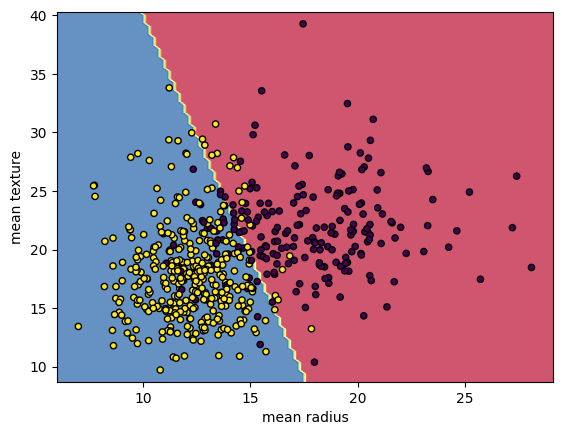

Linear Kernel SVM Evaluation:
Accuracy: 0.9122807017543859
Precision: 0.9043478260869565
Recall: 0.9629629629629629
F1 Score: 0.9327354260089686


In [47]:
# Se crea una instancia de SVM usando un kernel lineal
svn_lineal = SVC(kernel='linear')

#Se entrena la SVM
svn_lineal.fit(X_train, y_train)

#Se realiza una predicción con el modelo entrenado
y_pred = svn_lineal.predict(X_test)

# Se dibuja el limite de decisión
dibujar_svm(svn_lineal)

# Evaluación del proceso de clasificación
print("SVM: Kernel Lineal")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

## **Entrenamos un modelo de SVM con kernel tipo rbf**

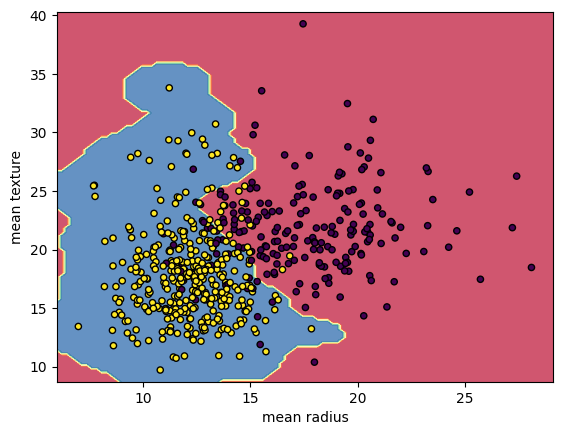

SVM: Kernel rbf
Accuracy: 0.9298245614035088
Precision: 0.9285714285714286
Recall: 0.9629629629629629
F1 Score: 0.9454545454545454


In [49]:
# Se crea una instancia de SVM usando un kernel lineal
svm_rbf = SVC(kernel="rbf", gamma=0.5, C=1.0)

# #Se entrena la SVM
svm_rbf.fit(X, y)

#Se realiza una predicción con el modelo entrenado
y_pred = svm_rbf.predict(X_test)

# Se dibuja el limite de decisión
dibujar_svm(svm_rbf)

# Evaluación del proceso de clasificación
print("SVM: Kernel rbf")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

# **Podemos guardar estas versiones de los modelos y volver a cargar para usar con posterioridad**

In [53]:
import joblib

# Guardamos los modelos previamente entrenados
joblib.dump(svn_lineal, 'svm_lineal_model_v1.0.0.pkl')
joblib.dump(svm_rbf, 'svm_rbf_model_v1.0.0.pkl')

['svm_rbf_model_v1.0.0.pkl']

In [56]:
# Cargamos ahora nuevamente uno de los modelo de SVM (solo para confirmar que funciona :))
loaded_svm_lineal_model = joblib.load('svm_lineal_model_v1.0.0.pkl')
loaded_svm_rbf_model = joblib.load('svm_rbf_model_v1.0.0.pkl')

y_pred_loaded_linear = loaded_svm_lineal_model.predict(X_test)
y_pred_loaded_rbf = loaded_svm_rbf_model.predict(X_test)

print("Accuracy del modelo guardado (Lineal):", metrics.accuracy_score(y_test, y_pred_loaded_linear))
print("Accuracy del modelo guardado (RBF):", metrics.accuracy_score(y_test, y_pred_loaded_rbf))

Accuracy del modelo guardado (Lineal): 0.9122807017543859
Accuracy del modelo guardado (RBF): 0.9298245614035088
